<a href="https://colab.research.google.com/github/FatihKarabas/AI-WORKS/blob/main/PRSA_data_2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kentsel Hava Kalitesinin Zaman Serisi ve Çevresel Değişkenlerle Analizi

PM2.5 değerlerinin zaman serisi desenlerini ve meteorolojik etkileşimlerini analiz ederek hava kirliliğini öngörmek ve sağlık politikalarının hazırlanmasında destek sunmak.

In [1]:
from google.colab import drive

# Google Drive'ı bağla
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Dosyanın tam yolu
file_path = '/content/drive/MyDrive/dataset/PRSA_data_2010.1.1-2014.12.31.csv'

# CSV dosyasını oku
df = pd.read_csv(file_path)


## 🔍 TASK 1: Zaman Serisi Verisi Keşfi – Görevler

1.	Veri Önizlemesi: İlk gözlemleri inceleyerek tarih ve ölçüm bilgilerini kontrol et.

In [3]:
df.head()  # Varsayılan olarak ilk 5 satırı gösterir

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [4]:
df.sample(10)  # Varsayılan olarak son 5 satırı gösterir

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
42561,42562,2014,11,9,9,38.0,-3,8.0,1028.0,NW,19.67,0,0
10365,10366,2011,3,8,21,14.0,-18,5.0,1025.0,NW,11.18,0,0
33683,33684,2013,11,4,11,33.0,-7,16.0,1030.0,cv,0.89,0,0
17212,17213,2011,12,19,4,23.0,-18,-3.0,1031.0,NE,4.02,0,0
9367,9368,2011,1,26,7,41.0,-21,-13.0,1040.0,NW,17.45,0,0
1016,1017,2010,2,12,8,14.0,-21,-9.0,1038.0,NW,17.43,0,0
20901,20902,2012,5,20,21,NaN,16,18.0,1015.0,cv,1.34,0,0
22871,22872,2012,8,10,23,76.0,20,25.0,1006.0,SE,27.73,0,0
9949,9950,2011,2,19,13,92.0,-12,9.0,1023.0,cv,0.89,0,0
22496,22497,2012,7,26,8,68.0,25,25.0,1004.0,SE,1.79,0,0


2.	Veri Seti Boyutu: Gözlem ve sütun sayısını tespit ederek veri hacmini tanımla.

In [5]:
df.shape  # (satır sayısı, sütun sayısı)

(43824, 13)

3.	Veri Tipi ve Eksiklik Kontrolü: Tarihsel sütunların doğru formatta olup olmadığını ve eksik verileri incele.

In [6]:
df.info()  # Veri tipi ve eksik değerleri gösterir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


4.	Özet İstatistikler: PM2.5 ve diğer meteorolojik değişkenler için temel istatistiksel verileri yorumla.

In [7]:
df[['pm2.5', 'TEMP', 'DEWP', 'PRES', 'Iws',"Is", "Ir"]].describe()

,pm2.5,TEMP,DEWP,PRES,Iws,Is,Ir
count,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,98.613215,12.448521,1.817246,1016.447654,23.889140,0.052734,0.194916
std,92.050387,12.198613,14.433440,10.268698,50.010635,0.760375,1.415867
min,0.000000,-19.000000,-40.000000,991.000000,0.450000,0.000000,0.000000
25%,29.000000,2.000000,-10.000000,1008.000000,1.790000,0.000000,0.000000
50%,72.000000,14.000000,2.000000,1016.000000,5.370000,0.000000,0.000000
75%,137.000000,23.000000,15.000000,1025.000000,21.910000,0.000000,0.000000
max,994.000000,42.000000,28.000000,1046.000000,585.600000,27.000000,36.000000


Yorum:

PM2.5’in ortalaması 98.6 µg/m³, bu değer Dünya Sağlık Örgütü’nün önerdiği sınırların oldukça üzerindedir.

Maksimum değerin 994 olması, çok yüksek seviyede hava kirliliği yaşandığını göstermektedir.

Standart sapmanın yüksek olması dağılımın geniş ve uç değerler içerdiğini düşündürmektedir.

Medyan değerin ortalamadan düşük olması, dağılımın sağa çarpık olduğunu gösterir (bazı çok yüksek değerler ortalamayı yükseltiyor).

5.	PM2.5 Eksik Veri Analizi: Hedef değişken olan PM2.5’te eksik gözlem oranını belirle.

In [8]:
# Eksik değerleri tespit et
missing_values = df.isnull().sum()

# Eksik veri içeren sütunları filtreleyerek sadece eksik değerleri gösterelim
missing_values = missing_values[missing_values > 0]

# Sonucu daha düzenli görüntüleyelim
print("Eksik Değer Sayıları:\n")
print(missing_values)

Eksik Değer Sayıları:

pm2.5    2067
dtype: int64


In [ ]:
# pm2.5 sütunundaki eksik değerlerin yüzdesi
missing_percentage = df['pm2.5'].isnull().mean() * 100
print(f"\npm2.5 sütunundaki eksik değer yüzdesi: {missing_percentage:.4f}%")


pm2.5 sütunundaki eksik değer yüzdesi: 4.7166%


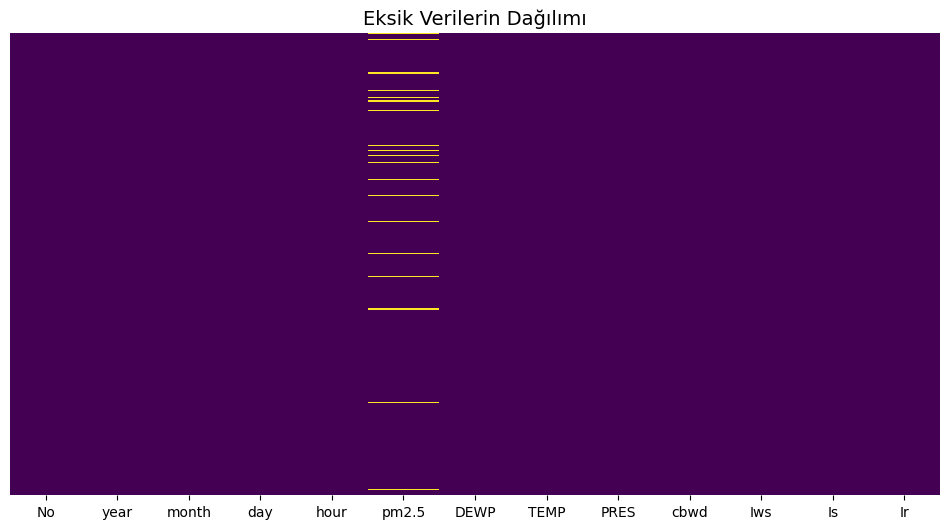

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Eksik Verilerin Dağılımı", fontsize=14)
plt.show()

6.	Zaman Serisi Görselleştirme: PM2.5 değerlerinin zaman içerisindeki seyrini genel olarak analiz et.

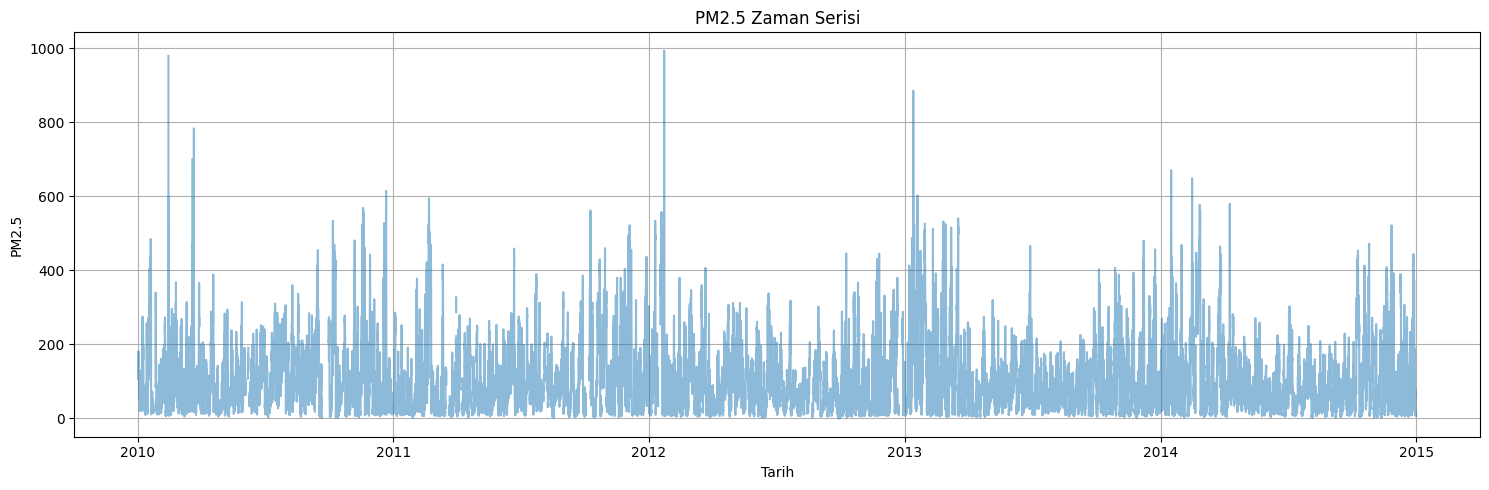

In [22]:
import matplotlib.pyplot as plt

# Tarihi datetime formatına çevir
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Zaman serisi çizimi
plt.figure(figsize=(15, 5))
plt.plot(df['datetime'], df['pm2.5'], alpha=0.5)
plt.title("PM2.5 Zaman Serisi")
plt.xlabel("Tarih")
plt.ylabel("PM2.5")
plt.grid(True)
plt.tight_layout()
plt.show()
# Bu grafik, PM2.5 seviyelerinin zaman içindeki dalgalanmalarını gösterecektir.

**Genel Eğilimler:**

**Genel Desen:** Grafik, PM2.5 seviyelerinin kaydedilen dönemdeki (veri kaynağına göre 2010-2014) dalgalanmalarını gösterir. Genel olarak artan veya azalan eğilimleri veya PM2.5 seviyelerinin belirli bir aralıkta nispeten sabit kalıp kalmadığını arardık.

**Mevsimsellik:** Belirli dönemlerde tekrar eden belirgin desenler (örneğin, kışın daha yüksek seviyeler, yazın daha düşük seviyeler) PM2.5 seviyelerinde mevsimsellik olduğunu ve bunun muhtemelen hava desenleri, ısıtma uygulamaları veya tarımsal faaliyetler gibi faktörlerden etkilendiğini gösterir.

**Ani Yükselişler/Düşüşler:** PM2.5 seviyelerinde meydana gelen ani, önemli artışlar veya düşüşler (ani yükselişler veya düşüşler) not edilmesi önemlidir. Bunlar, endüstriyel kazalar, orman yangınları veya hava kalitesini etkileyen düzenlemelerdeki değişiklikler gibi belirli olayları gösterebilir.

7.	Zaman Bileşeni Türetme: Tarih değişkeninden yıl, ay, gün gibi bileşenleri ayırarak zaman analizine hazırla.

In [23]:
# Yıl, ay, gün bileşenlerini çıkart
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day

8.	Aylık Ortalamalar: Aylık bazda PM2.5 değerlerinin nasıl değiştiğini hesapla ve yorumla.

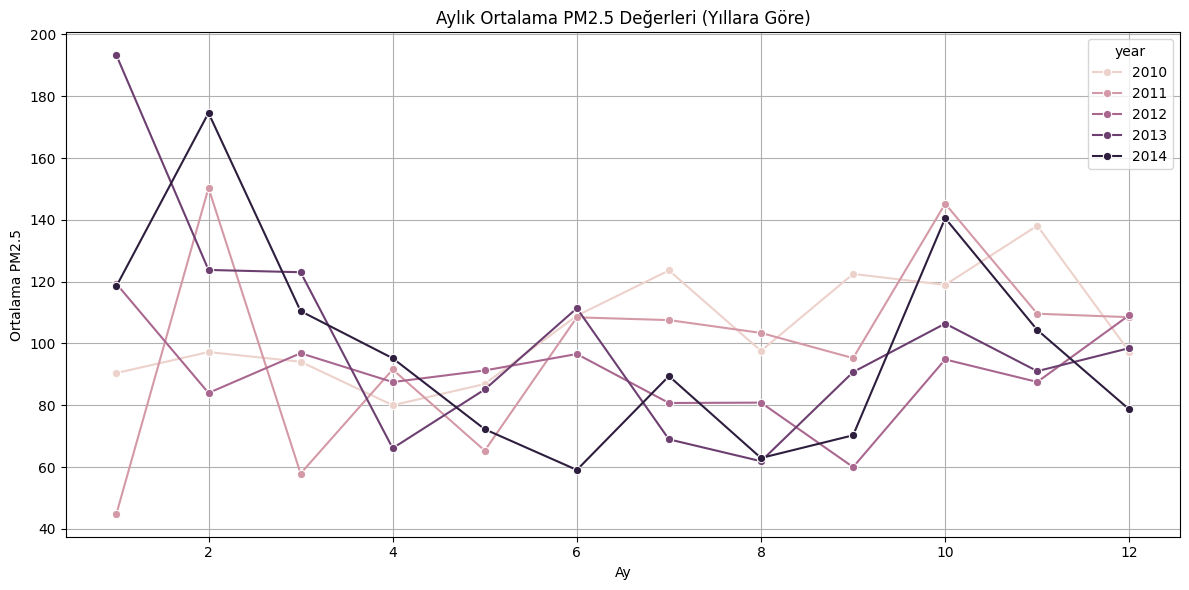

In [24]:
# Aylık ortalamalar
monthly_avg = df.groupby(['year', 'month'])['pm2.5'].mean().reset_index()

# Görselleştirme
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, x='month', y='pm2.5', hue='year', marker='o')
plt.title("Aylık Ortalama PM2.5 Değerleri (Yıllara Göre)")
plt.xlabel("Ay")
plt.ylabel("Ortalama PM2.5")
plt.grid(True)
plt.tight_layout()
plt.show()
# Bu grafik, yıllar boyunca aylık PM2.5 değişimini kıyaslamanızı sağlar.

**Kış aylarında Yüksek PM2.5:** Kış aylarında (Aralık, Ocak, Şubat) çoğu yıl boyunca daha yüksek PM2.5 seviyeleri görebiliriz. Bu, artan ısınma, daha az atmosferik dağılım ve belki de kirleticileri yere yakın tutan sıcaklık tersinmeleri gibi faktörler nedeniyle birçok alanda yaygın bir modeldir.
**Yaz Aylarında Daha Düşük PM2.5:** Yaz aylarında (Haziran, Temmuz, Ağustos) daha düşük PM2.5 seviyeleri gözlemleme olasılığı vardır. Bu, artan atmosferik karışım, daha fazla yağmur (kirleticilerin yıkanmasına yardımcı olur) ve emisyon modellerindeki değişikliklerden kaynaklanıyor olabilir.

**Yıllık Değişimler:**
**Genel Eğilim:** Her yılın çizgilerini inceleyerek, ortalama PM2.5 değerlerinde genel bir yukarı veya aşağı yönlü eğilim görebiliriz. Çizgiler genel olarak yıllar içinde yükseliyorsa, bu zamanla hava kirliliğinde bir artış olduğunu gösterir. Tersine, çizgiler düşüyorsa, bu hava kalitesinde iyileşme olduğunu gösterir.

**Belirli Yıllık Farklar:** PM2.5 seviyelerinin diğer yıllara kıyasla alışılmadık derecede yüksek veya düşük olduğu belirli yıllar olabilir. Bu değişimleri analiz etmek, bu dönemlerde hava kalitesini etkilemiş olabilecek olası olaylar veya değişiklikler hakkında fikir verebilir.

9.	Mevsimsel Dağılım: Aylar üzerinden PM2.5 seviyesinin dağılımını analiz ederek dönemsel farkları tespit et.

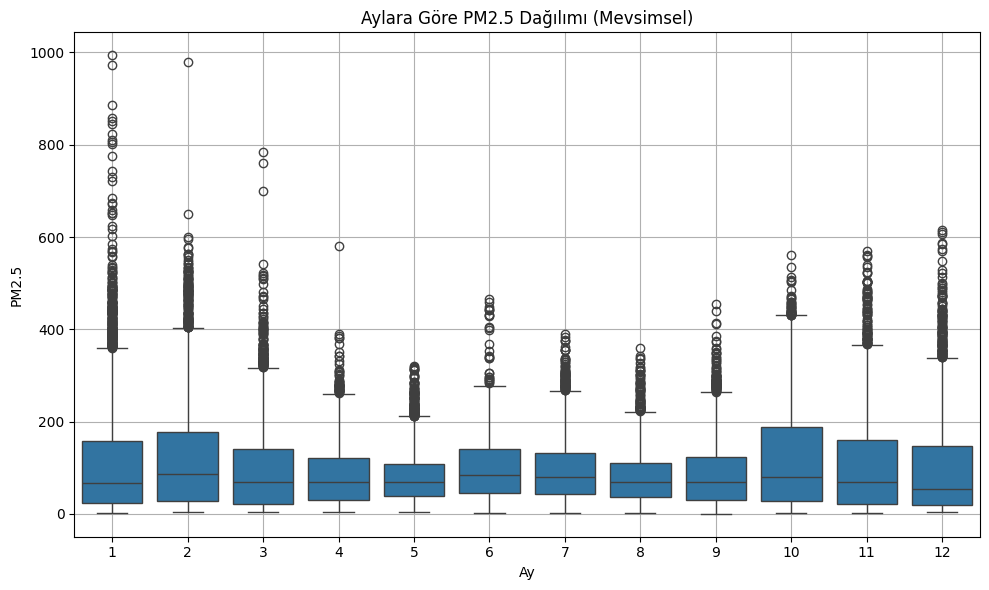

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='pm2.5', data=df)
plt.title("Aylara Göre PM2.5 Dağılımı (Mevsimsel)")
plt.xlabel("Ay")
plt.ylabel("PM2.5")
plt.grid(True)
plt.tight_layout()
plt.show()
# Bu analiz ile hangi ayda hava kalitesinin daha kötü olduğunu görebilirsiniz (örneğin kış aylarında PM2.5 seviyesi genelde daha yüksek olur).

Kış aylarında daha yüksek PM2.5 seviyeleri gözlemlenmektdir ; bu durum, ısınma ve azalan atmosferik dağılım gibi faktörler nedeniyle oluşabilen yaygın bir gözlemdir.

10.	Korelasyon Analizi: Meteorolojik faktörlerle PM2.5 arasındaki ilişkileri değerlendirerek anlamlı bağlar kur.

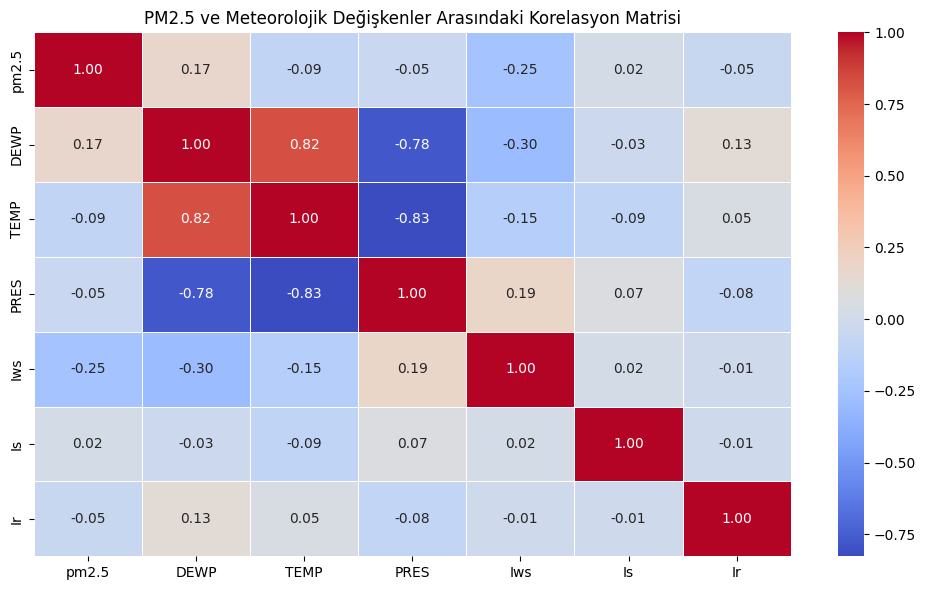

pm2.5    1.000000
DEWP     0.171423
Is       0.019266
PRES    -0.047282
Ir      -0.051369
TEMP    -0.090534
Iws     -0.247784
Name: pm2.5, dtype: float64


In [ ]:
# PM2.5 ve diğer meteorolojik  değişkenlerin korelasyon matrisini al
correlation_matrix = df[['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']].corr()

# Korelasyon matrisini çiz
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("PM2.5 ve Meteorolojik Değişkenler Arasındaki Korelasyon Matrisi")
plt.tight_layout()
plt.show()

# PM2.5 ile diğer değişkenler arası korelasyonları yazdır
print(correlation_matrix['pm2.5'].sort_values(ascending=False))

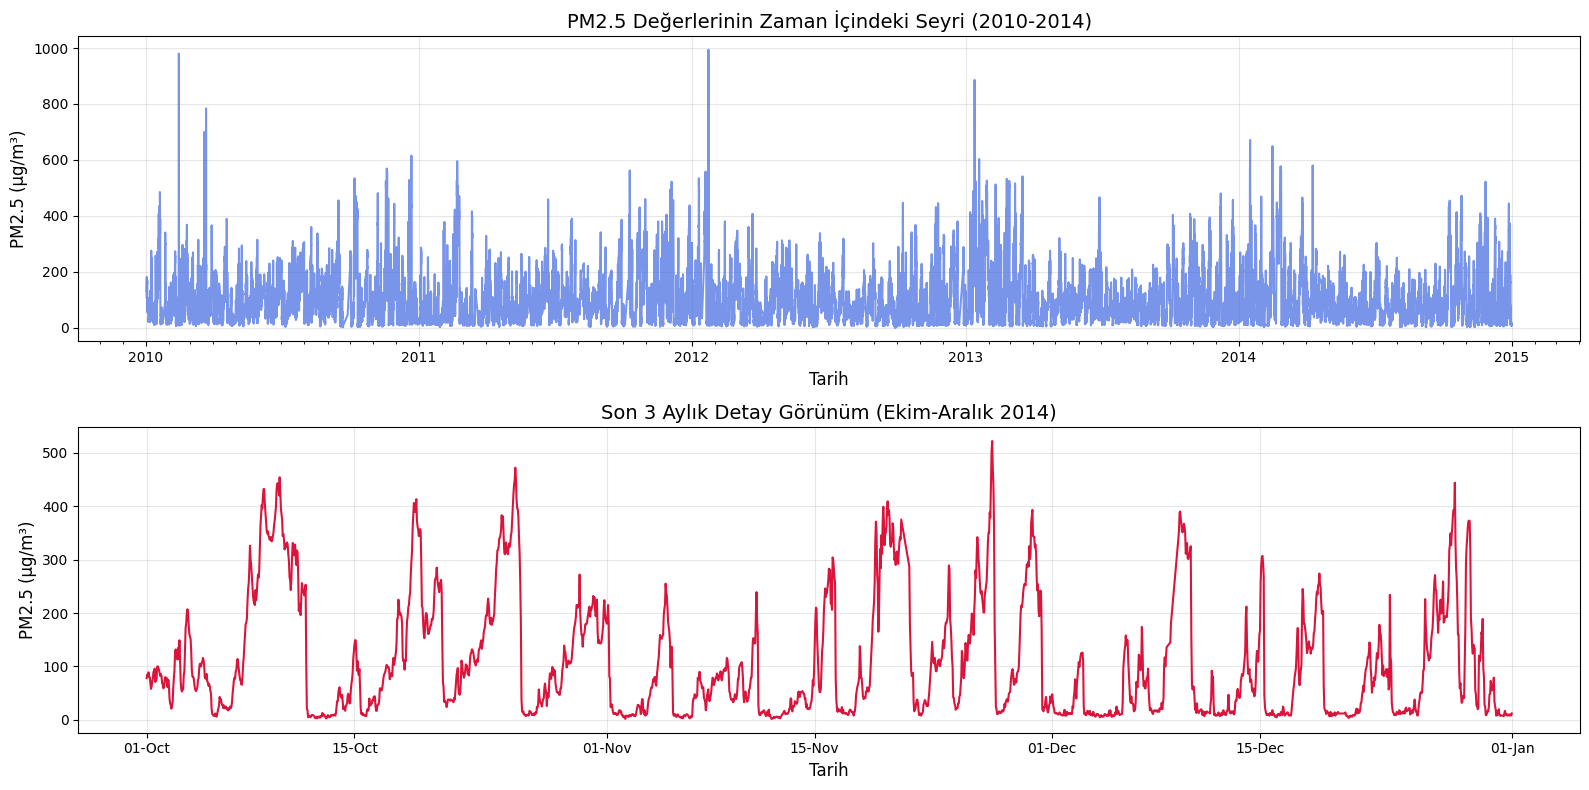

<ipython-input-47-a3a5ba4f7553>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year_month', y='pm2.5', data=monthly_avg, palette='viridis')


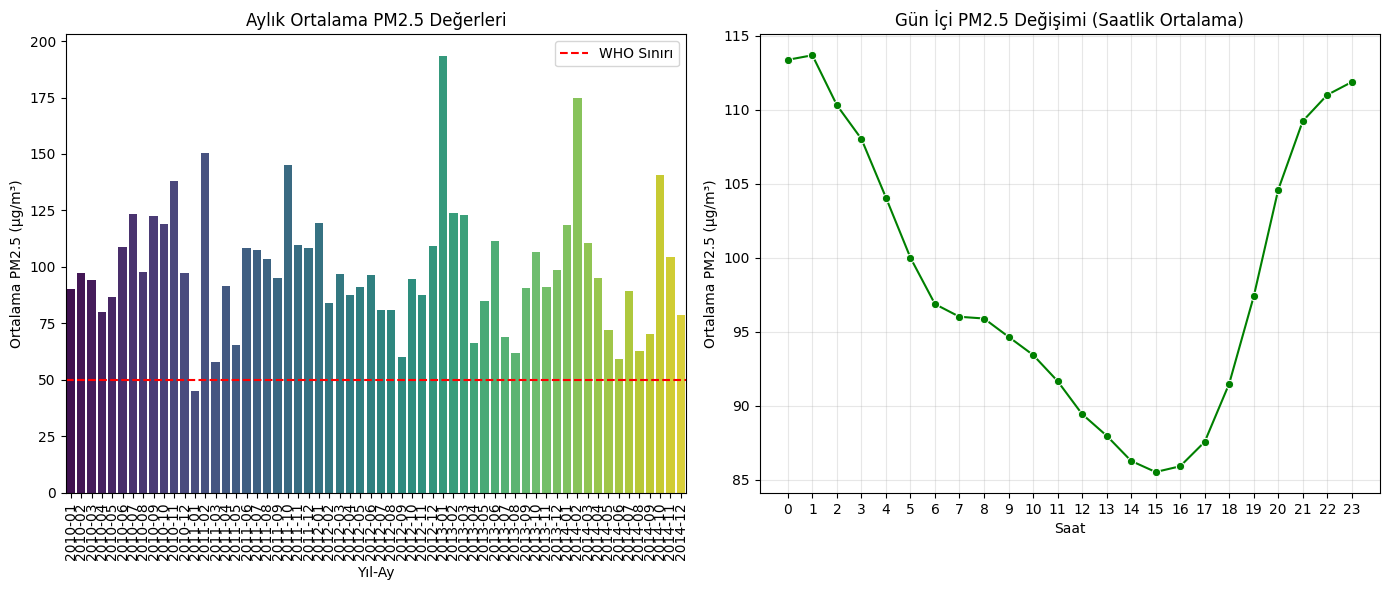

In [47]:
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

# 1. Tarih bilgisini birleştirerek datetime sütunu oluşturma
df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# 2. Zaman serisi verisini tarihe göre sıralama
df = df.sort_values('date')

# 3. PM2.5 değerlerinin zaman içindeki seyrini görselleştirme
plt.figure(figsize=(16, 8))

# 3.1. Tüm veri seti üzerinde PM2.5 trendi
plt.subplot(2, 1, 1)
sns.lineplot(x='date', y='pm2.5', data=df, color='royalblue', alpha=0.7)
plt.title('PM2.5 Değerlerinin Zaman İçindeki Seyri (2010-2014)', fontsize=14)
plt.xlabel('Tarih', fontsize=12)
plt.ylabel('PM2.5 (µg/m³)', fontsize=12)
plt.grid(True, alpha=0.3)

# X-ekseni formatlama
ax = plt.gca()
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
ax.xaxis.set_minor_locator(MonthLocator())

# 3.2. Son 3 aylık detay görünüm
plt.subplot(2, 1, 2)
last_3months = df[df['date'] >= pd.to_datetime('2014-10-01')]
sns.lineplot(x='date', y='pm2.5', data=last_3months, color='crimson')
plt.title('Son 3 Aylık Detay Görünüm (Ekim-Aralık 2014)', fontsize=14)
plt.xlabel('Tarih', fontsize=12)
plt.ylabel('PM2.5 (µg/m³)', fontsize=12)
plt.grid(True, alpha=0.3)
ax = plt.gca()
ax.xaxis.set_major_formatter(DateFormatter('%d-%b'))

plt.tight_layout()
plt.show()

# 4. Mevsimsel Analiz
plt.figure(figsize=(14, 6))

# 4.1. Aylık ortalama PM2.5 değerleri
monthly_avg = df.groupby(['year', 'month'])['pm2.5'].mean().reset_index()
monthly_avg['year_month'] = monthly_avg['year'].astype(str) + '-' + monthly_avg['month'].astype(str).str.zfill(2)

plt.subplot(1, 2, 1)
sns.barplot(x='year_month', y='pm2.5', data=monthly_avg, palette='viridis')
plt.title('Aylık Ortalama PM2.5 Değerleri', fontsize=12)
plt.xlabel('Yıl-Ay', fontsize=10)
plt.ylabel('Ortalama PM2.5 (µg/m³)', fontsize=10)
plt.xticks(rotation=90)
plt.axhline(y=50, color='r', linestyle='--', label='WHO Sınırı')
plt.legend()

# 4.2. Saatlik ortalama PM2.5 değerleri
hourly_avg = df.groupby('hour')['pm2.5'].mean().reset_index()

plt.subplot(1, 2, 2)
sns.lineplot(x='hour', y='pm2.5', data=hourly_avg, marker='o', color='green')
plt.title('Gün İçi PM2.5 Değişimi (Saatlik Ortalama)', fontsize=12)
plt.xlabel('Saat', fontsize=10)
plt.ylabel('Ortalama PM2.5 (µg/m³)', fontsize=10)
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Grafik 1: **PM2.5 Değerlerinin Zaman İçindeki Seyri (2010-2014) & Son 3 Aylık Detay Görünüm (Ekim-Aralık 2014)**
Bu grafik iki alt grafikten oluşmaktadır:

Alt Grafik 1 (**Genel Eğilim**):

**Genel Desen:** 2010'dan 2014'e kadar olan tüm dönemdeki PM2.5 seviyelerini gösterir. Yıllar boyunca PM2.5 seviyelerinde önemli dalgalanmalar görebiliriz, bu da daha yüksek ve daha düşük hava kirliliği dönemlerini gösterir.
**Mevsimsellik:** PM2.5 seviyelerinin kış aylarında daha yüksek ve yaz aylarında daha düşük olma eğiliminde olduğu tekrarlayan bir desen gözlemlemeniz muhtemeldir. Bu, kışın artan ısıtma ve yazın daha iyi hava dağılımı gibi faktörlerden kaynaklanan yaygın bir desendir.
**Ani Yükselişler/Düşüşler:** Endüstriyel kazalar, hava desenleri veya düzenlemelerdeki değişiklikler gibi belirli olaylardan kaynaklanabilen PM2.5 seviyelerinde bazı belirgin yükselişler veya düşüşler olabilir. Alt Grafik 2 (Son 3 Ay):

**Ayrıntılı Görünüm:** Bu alt grafik 2014'ün son üç ayına (**Ekim, Kasım, Aralık**) odaklanıyor. Bu belirli dönemdeki PM2.5 dalgalanmalarının daha ayrıntılı bir görünümünü sağlıyor. Veri setinin sonuna doğru ortaya çıkan herhangi bir kısa vadeli eğilim veya kalıp olup olmadığını görmeye yardımcı oluyor.

Grafik 2: **Aylık Ortalama PM2.5 Değerleri & Gün İçi PM2.5 Değişimi (Saatlik Ortalama)**
Bu grafiğin ayrıca iki alt grafiği vardır:

**Alt Grafik 1 (Aylık Ortalamalar):**

**Mevsimsel Değişim:** Çubuk grafiği, yıllar boyunca her ay için ortalama PM2.5 seviyelerini gösterir. Kış aylarında (Aralık, Ocak, Şubat) yaz aylarına (Haziran, Temmuz, Ağustos) kıyasla daha yüksek PM2.5 seviyelerini açıkça görebiliriz. Bu, ilk grafikte gözlemlenen mevsimsellik modelini güçlendirir.

**WHO Limiti:** Kırmızı kesikli çizgi, WHO'nun (Dünya Sağlık Örgütü) PM2.5 için önerdiği limiti temsil eder. Çubukların çoğu bu limiti aşmaktadır ve bu da hava kalitesinin genellikle önerilen standartların altında olduğunu göstermektedir.

**Alt Grafik 2 (Saatlik Ortalamalar):**

**Günlük Değişim:** Bu çizgi grafiği, günün saatleri boyunca ortalama PM2.5 seviyelerini gösterir. Genellikle yoğun trafik saatlerinde (sabah ve akşam işe gidiş gelişleri) daha yüksek PM2.5 seviyeleri ve gece veya sabahın erken saatlerinde daha düşük seviyeler gösterir. Bunun nedeni, bu zamanlarda artan araç emisyonları ve insan faaliyetleri olabilir.

------------------------------------

-------------------------------------------------

# TASK 2: Zaman Serisi ve Meteorolojik Veriler için 20 Adımda Veri Ön İşleme Süreci

## 1–5: Eksik Veri Tespiti ve Yönetimi
1.	Eksik Veri Oranlarının Hesaplanması:
Tüm sütunlarda eksik veri oranı hesaplanmalı; özellikle pm2.5, TEMP, PRES, Iws gibi ölçüm değişkenlerinde eksiklikler incelenmeli.

________________________________________


In [26]:
import missingno as msno

# Eksik veri oranlarını hesapla
missing_data = pd.DataFrame({
    'Eksik_Veri_Sayisi': df.isnull().sum(),
    'Eksik_Veri_Orani': (df.isnull().mean() * 100).round(2)
})

# Önemli ölçüm değişkenlerini filtrele
measurement_cols = ['pm2.5', 'TEMP', 'PRES', 'Iws', 'DEWP']
print("Ölçüm Değişkenlerinde Eksik Veri Oranları:")
print(missing_data.loc[measurement_cols])

Ölçüm Değişkenlerinde Eksik Veri Oranları:
       Eksik_Veri_Sayisi  Eksik_Veri_Orani
pm2.5               2067              4.72
TEMP                   0              0.00
PRES                   0              0.00
Iws                    0              0.00
DEWP                   0              0.00


2.	Zaman Dizisi Sırasına Göre Eksiklik Analizi:
Eksik gözlemler hangi zamanlarda yoğunlaşıyor? Belirli mevsim veya saat aralıklarında mı?


In [27]:
# Tarih sütunu oluştur (zaman serisi analizi için)
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Eksik verileri zaman serisi olarak analiz et
missing_over_time = df.set_index('datetime').isnull().resample('D').sum()

# Mevsimsel eksiklik analizi
missing_by_season = df.groupby('month')['pm2.5'].apply(lambda x: x.isnull().sum())
print("\nAylara Göre Eksik Veri Dağılımı:")
print(missing_by_season)

# Saatlik eksiklik analizi
missing_by_hour = df.groupby('hour')['pm2.5'].apply(lambda x: x.isnull().sum())
print("\nSaatlere Göre Eksik Veri Dağılımı:")
print(missing_by_hour)


Aylara Göre Eksik Veri Dağılımı:
month
1     249
2      11
3     164
4     195
5     111
6     195
7      73
8     383
9     267
10    141
11     99
12    179
Name: pm2.5, dtype: int64

Saatlere Göre Eksik Veri Dağılımı:
hour
0     91
1     81
2     87
3     81
4     82
5     86
6     86
7     87
8     88
9     87
10    92
11    99
12    95
13    77
14    89
15    87
16    89
17    84
18    75
19    84
20    86
21    85
22    85
23    84
Name: pm2.5, dtype: int64


3.	Eksik Gözlemleri Görselleştir:
Eksik verileri zaman ekseninde göstermek için çizgi grafikleri veya missingno gibi araçlar kullanılarak örüntüler belirlenmeli.


/usr/local/lib/python3.11/dist-packages/missingno/missingno.py:106: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts_array = pd.date_range(df.index[0], df.index[-1],
/usr/local/lib/python3.11/dist-packages/missingno/missingno.py:109: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts_ticks = pd.date_range(df.index[0], df.index[-1],


<Figure size 1200x600 with 0 Axes>

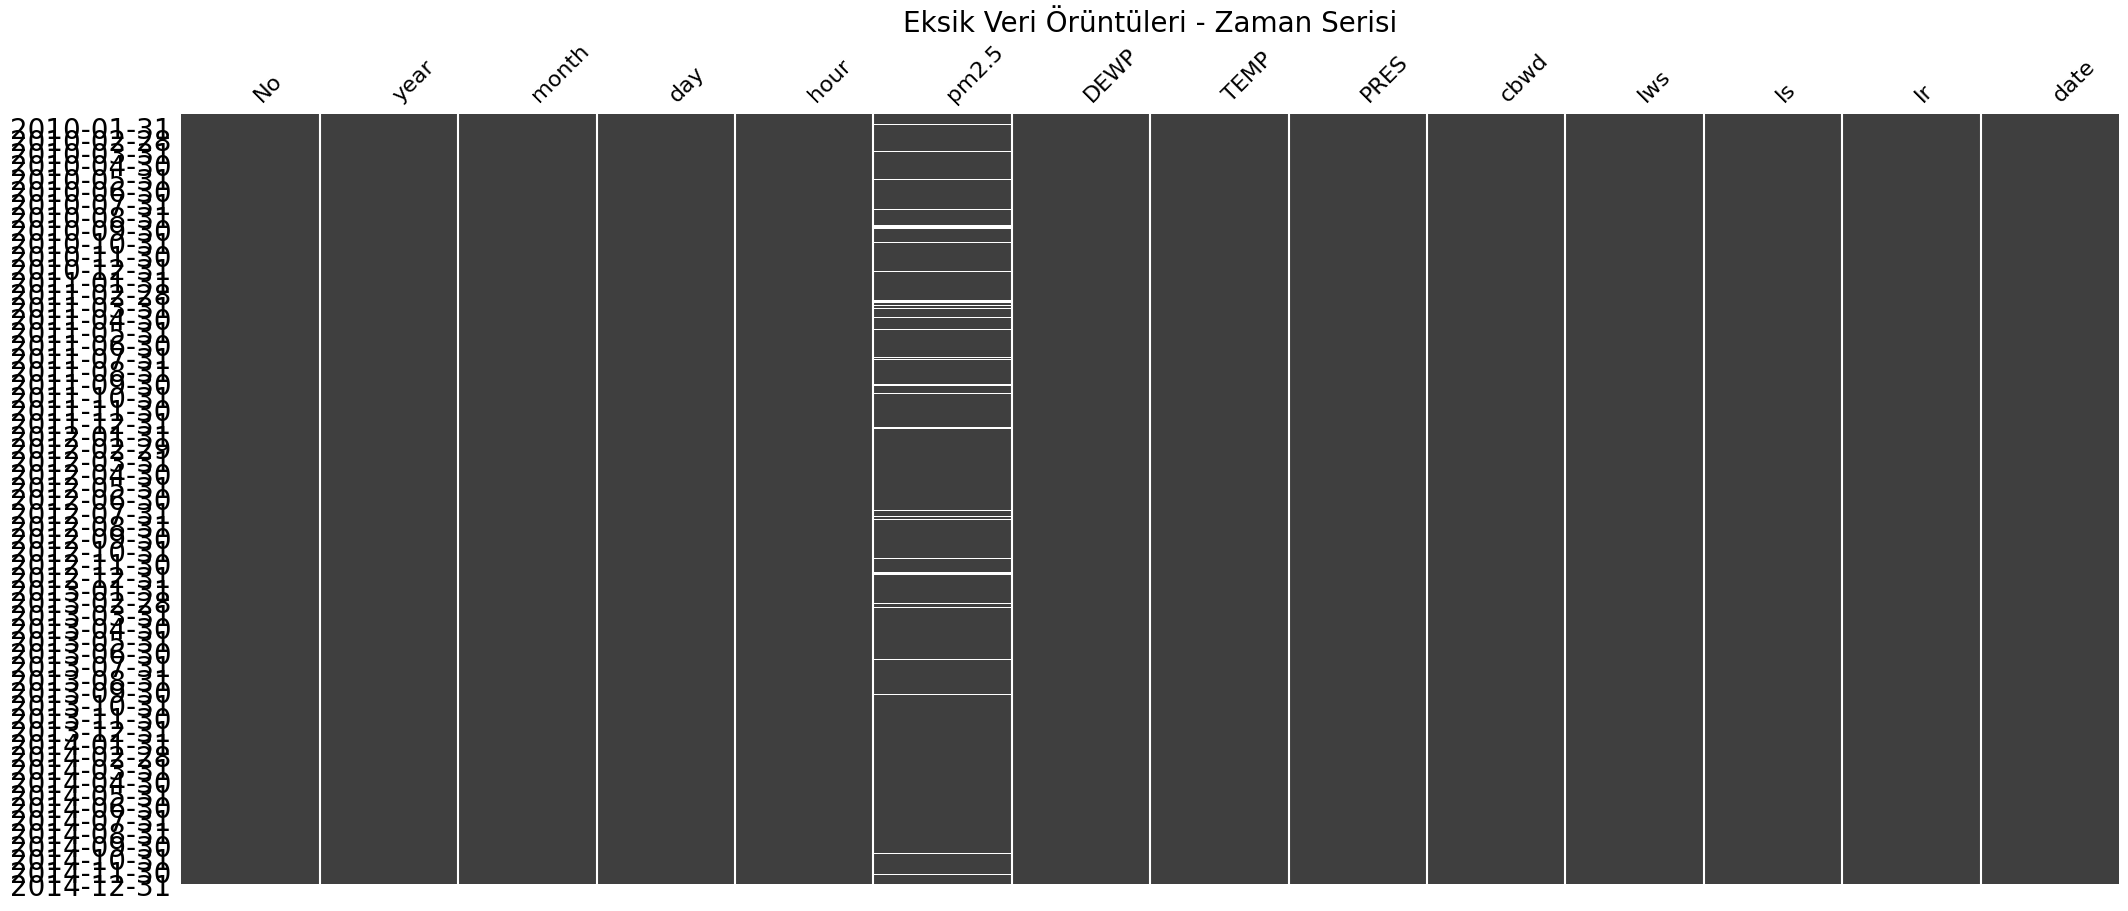

In [35]:
plt.figure(figsize=(12, 6))
msno.matrix(df.set_index('datetime'), freq='M', sparkline=False)
plt.title('Eksik Veri Örüntüleri - Zaman Serisi', fontsize=20)
plt.show()

Özünde, bu kod, eksik verilerin zaman içinde, özellikle aylık bazda, veri kümenizde nasıl dağıldığını görmenize yardımcı olan bir görselleştirme oluşturur. Grafikteki desenlere bakarak, veri toplama ile ilgili olası sorunlara ilişkin içgörüler elde edebilir veya eksik değerler nedeniyle verilerin daha az güvenilir olabileceği dönemleri belirleyebilirsiniz.

Grafikten Çıkarımlar:
Genel Veri Eksikliği: Renkli çubukların ve beyaz boşlukların genel dağılımına bakın. Çoğunlukla renkli bir grafik iyi veri eksiksizliğini gösterirken, geniş beyaz boşluklar daha fazla sayıda eksik değer olduğunu gösterir.

Zamansal Desenler: Eksik verilerin daha yaygın olduğu belirli zaman dilimleri (aylar veya yıllar) olup olmadığını gözlemleyin. Bu, o zamanlarda veri toplama ile ilgili sorunlar olduğunu gösterebilir. Örneğin, kış aylarında belirli değişkenler için çok sayıda beyaz boşluk görüyorsanız, bu, hava koşullarının veri toplamayı engellediğini gösterebilir.

Değişkene Özgü Eksiklik: Belirli değişkenlerin (sütunların) diğerlerinden daha fazla eksik veriye sahip olup olmadığına dikkat edin. Bu, söz konusu değişken için ölçüm aracıyla ilgili sorunlardan veya diğer veriyle ilgili sorunlardan kaynaklanıyor olabilir.

Eksik Değerler Arasındaki İlişkiler: Farklı değişkenlerin eksikliği arasında herhangi bir desen veya korelasyon olup olmadığını kontrol edin. Örneğin, iki değişkenin genellikle aynı anda eksik değerlere sahip olduğunu fark ederseniz, bu aralarında bir bağımlılık olduğunu gösterebilir.

Sizin durumunuzda, kodunuz tarafından oluşturulan gerçek grafiğe erişimim yok. Belirli verilerinizdeki desenleri ve ele alınması gereken olası sorunları belirlemek için yukarıda açıkladığım noktalara göre grafiği incelemelisiniz.

Örneğin:

Kış aylarında "pm2.5" satırında büyük boşluk blokları görürseniz, kış aylarında PM2.5 ölçümleri için daha fazla eksik veri olduğunu doğrular.
"TEMP" satırı çoğunlukla renkle doluysa, sıcaklık verileri muhtemelen oldukça eksiksizdir.
Eksik olmayan matris grafiğini dikkatlice analiz ederek, veri kümenizin bütünlüğü hakkında daha derin bir anlayış kazanabilir ve veri ön işleme sırasında eksik değerlerin nasıl ele alınacağı konusunda bilinçli kararlar alabilirsiniz.

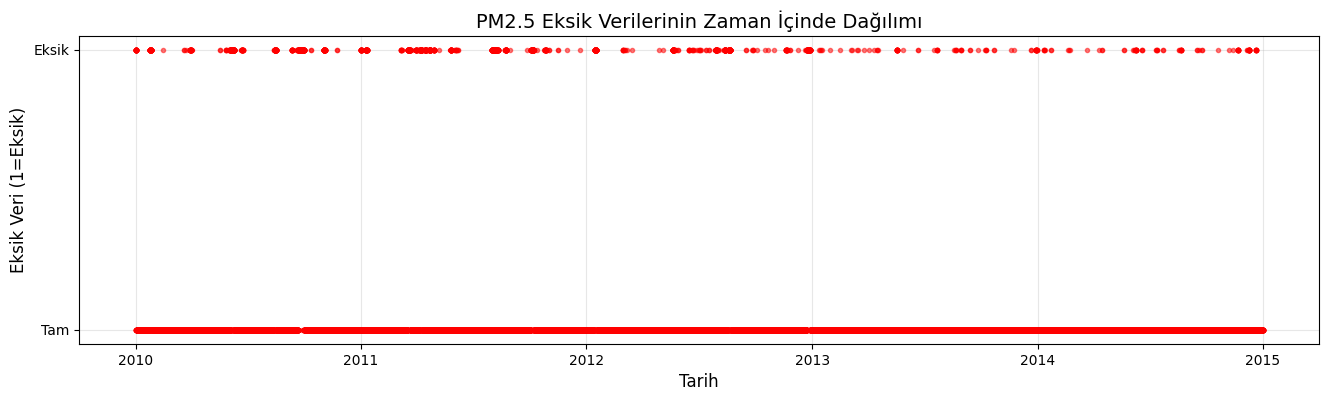

In [39]:
plt.figure(figsize=(16, 4))
plt.plot(df['datetime'], df['pm2.5'].isnull().astype(int), 'r.', alpha=0.5)
plt.title('PM2.5 Eksik Verilerinin Zaman İçinde Dağılımı', fontsize=14)
plt.xlabel('Tarih', fontsize=12)
plt.ylabel('Eksik Veri (1=Eksik)', fontsize=12)
plt.yticks([0, 1], ['Tam', 'Eksik'])
plt.grid(True, alpha=0.3)
plt.show()

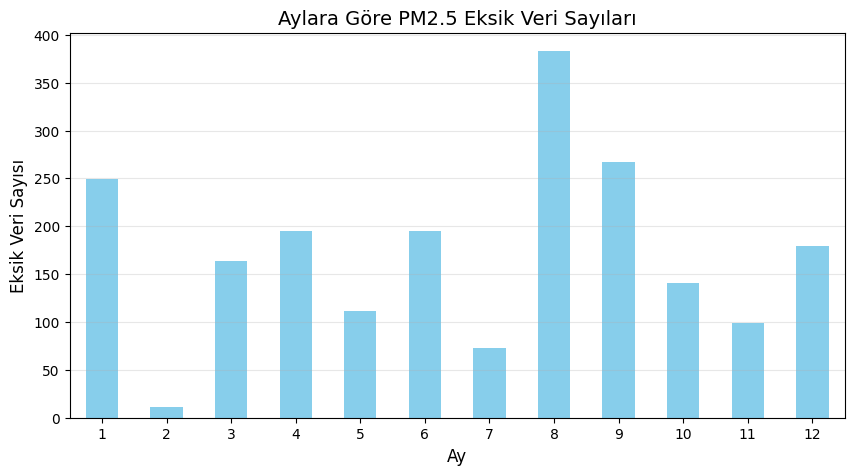

In [46]:
from ctypes import sizeof
plt.figure(figsize=(10, 5))
missing_by_season.plot(kind='bar', color='skyblue',)
plt.title('Aylara Göre PM2.5 Eksik Veri Sayıları', fontsize=14)
plt.xlabel('Ay', fontsize=12)
plt.ylabel('Eksik Veri Sayısı', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

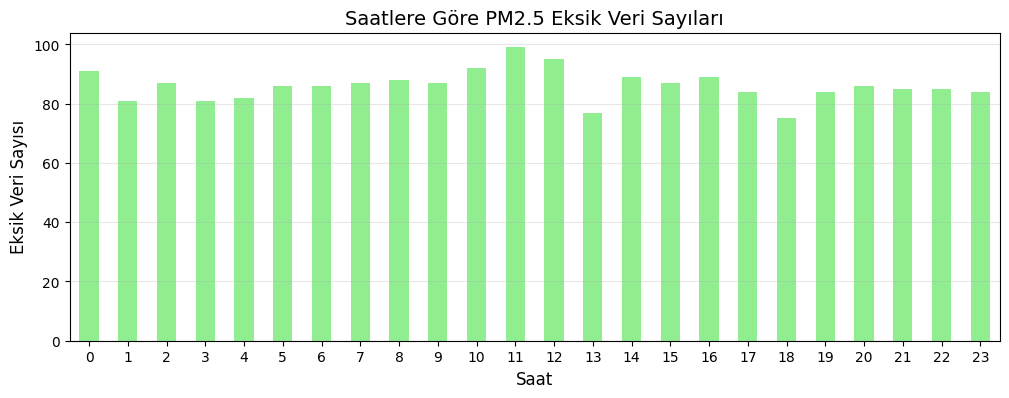

In [ ]:
plt.figure(figsize=(12, 4))
missing_by_hour.plot(kind='bar', color='lightgreen')
plt.title('Saatlere Göre PM2.5 Eksik Veri Sayıları', fontsize=14)
plt.xlabel('Saat', fontsize=12)
plt.ylabel('Eksik Veri Sayısı', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

/////////////////////////////////////////////////------------------------------

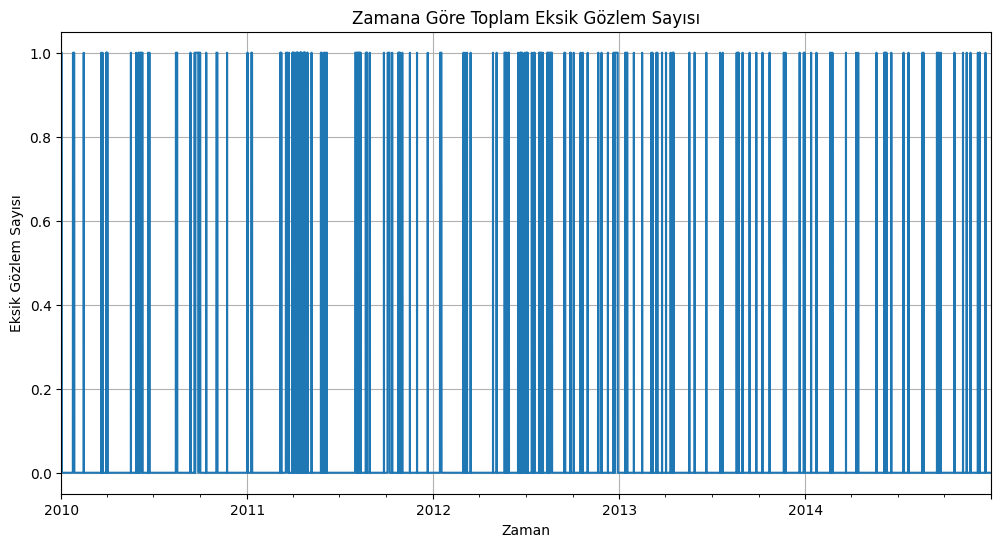

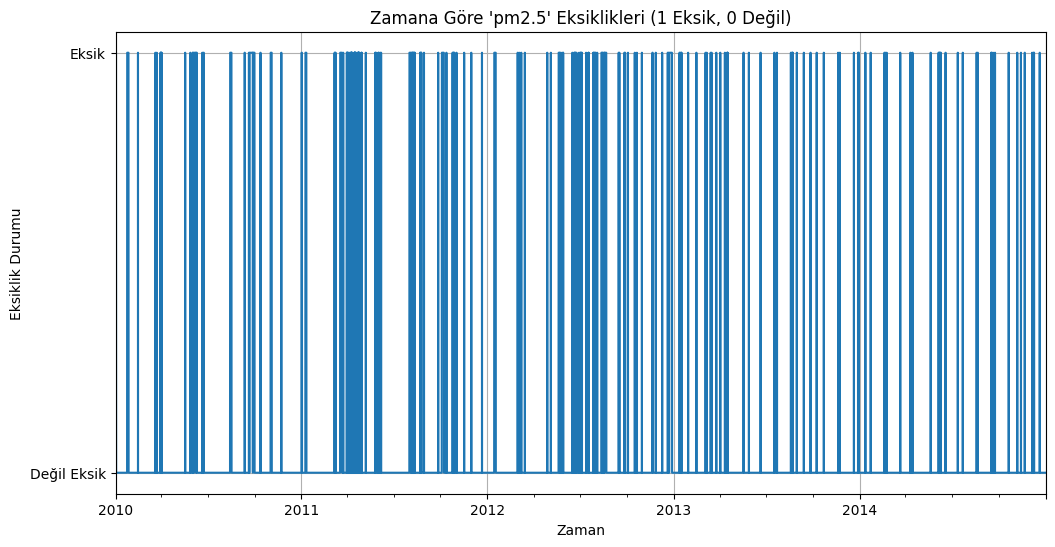

In [ ]:
import matplotlib.pyplot as plt

# Tüm sütunlardaki eksikliklerin zaman içindeki dağılımını görselleştir
plt.figure(figsize=(12, 6))
df.isnull().sum(axis=1).plot(title="Zamana Göre Toplam Eksik Gözlem Sayısı")
plt.xlabel("Zaman")
plt.ylabel("Eksik Gözlem Sayısı")
plt.grid(True)
plt.show()

# Belirli sütunlardaki eksikliklerin zaman içindeki dağılımını görselleştir
plt.figure(figsize=(12, 6))
df['pm2.5'].isnull().astype(int).plot(title="Zamana Göre 'pm2.5' Eksiklikleri (1 Eksik, 0 Değil)")
plt.xlabel("Zaman")
plt.ylabel("Eksiklik Durumu")
plt.yticks([0, 1], ['Değil Eksik', 'Eksik'])
plt.grid(True)
plt.show()

# Diğer sütunlar için de benzer grafikler çizebilirsiniz

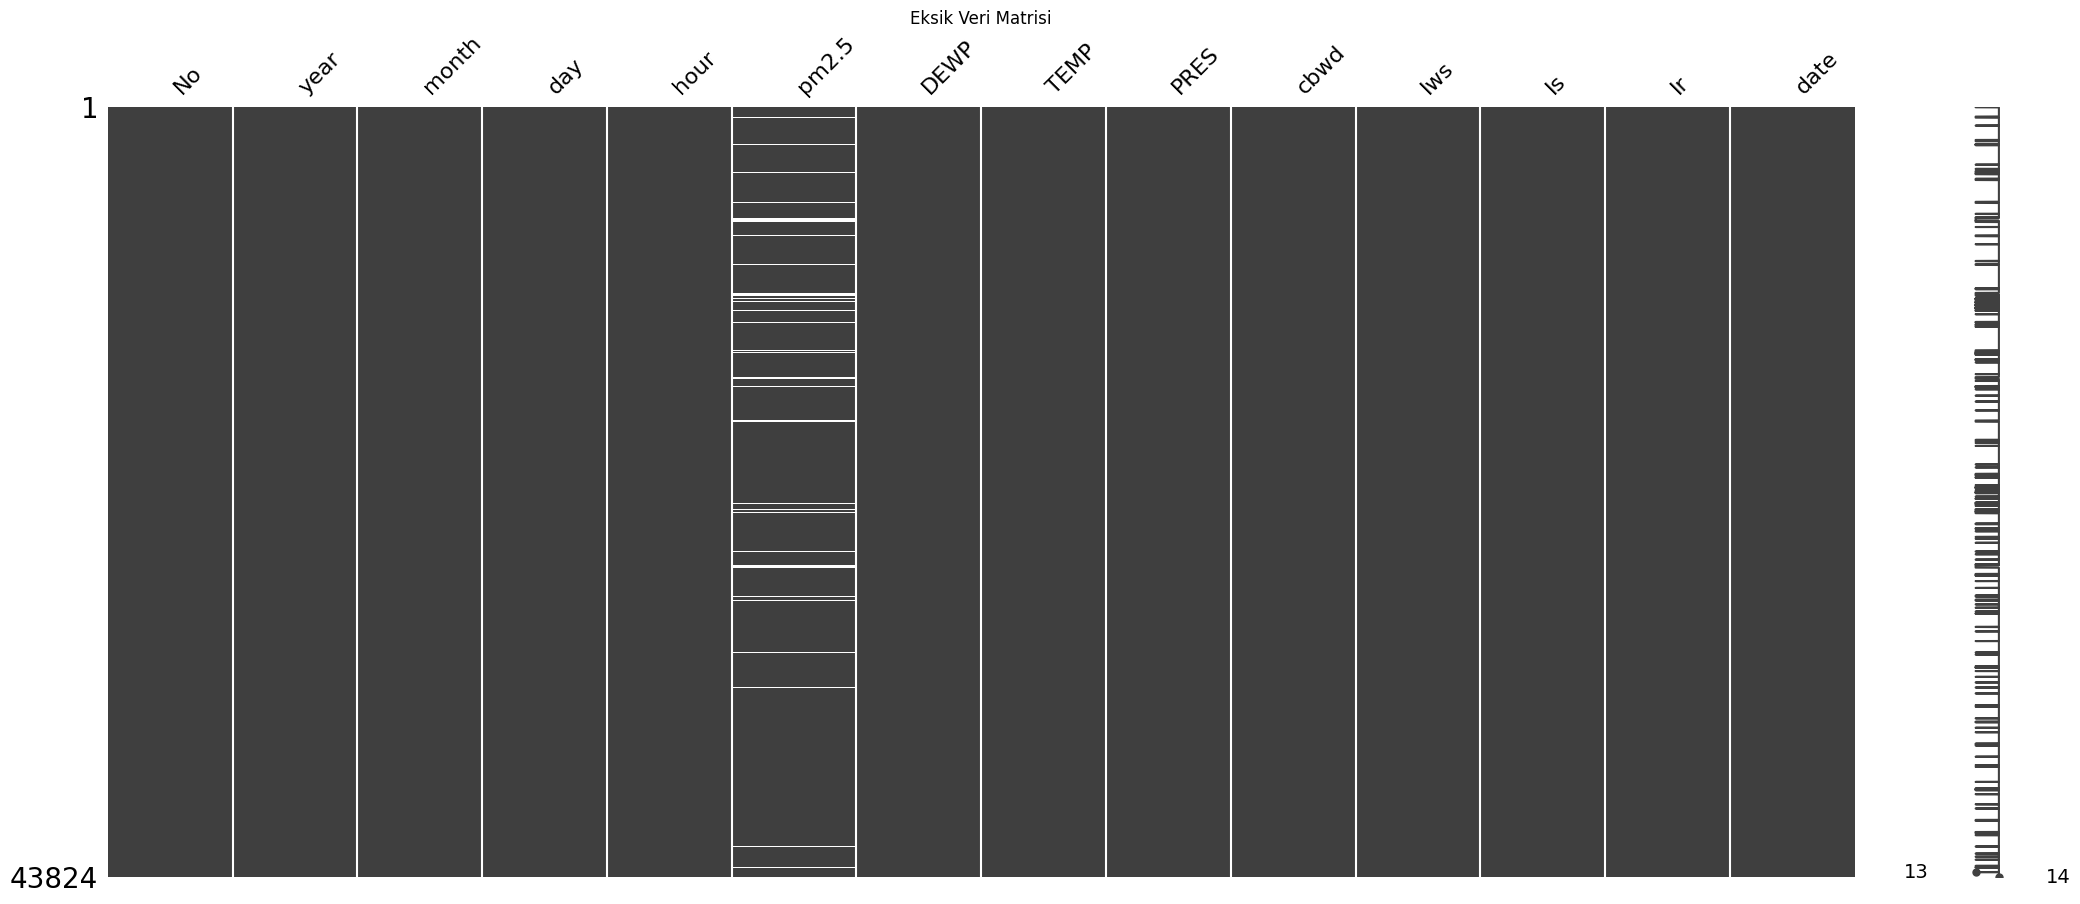

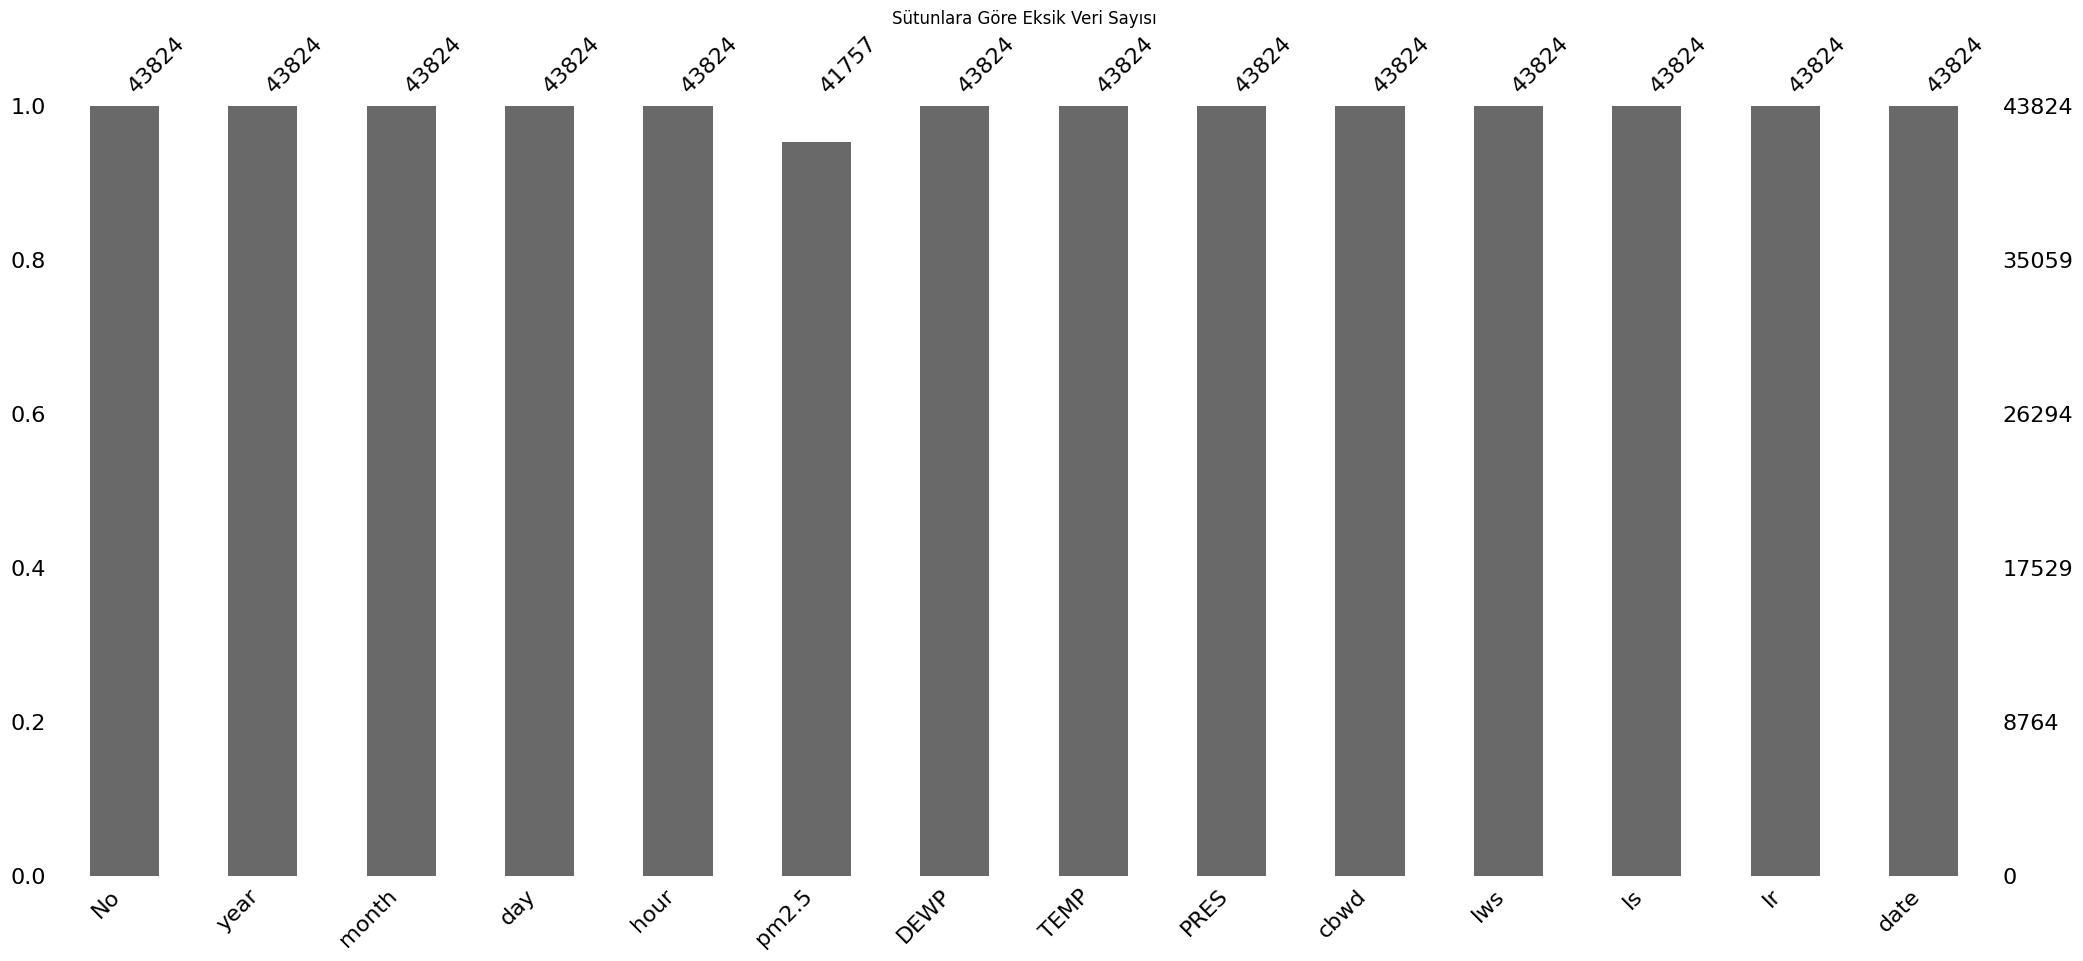

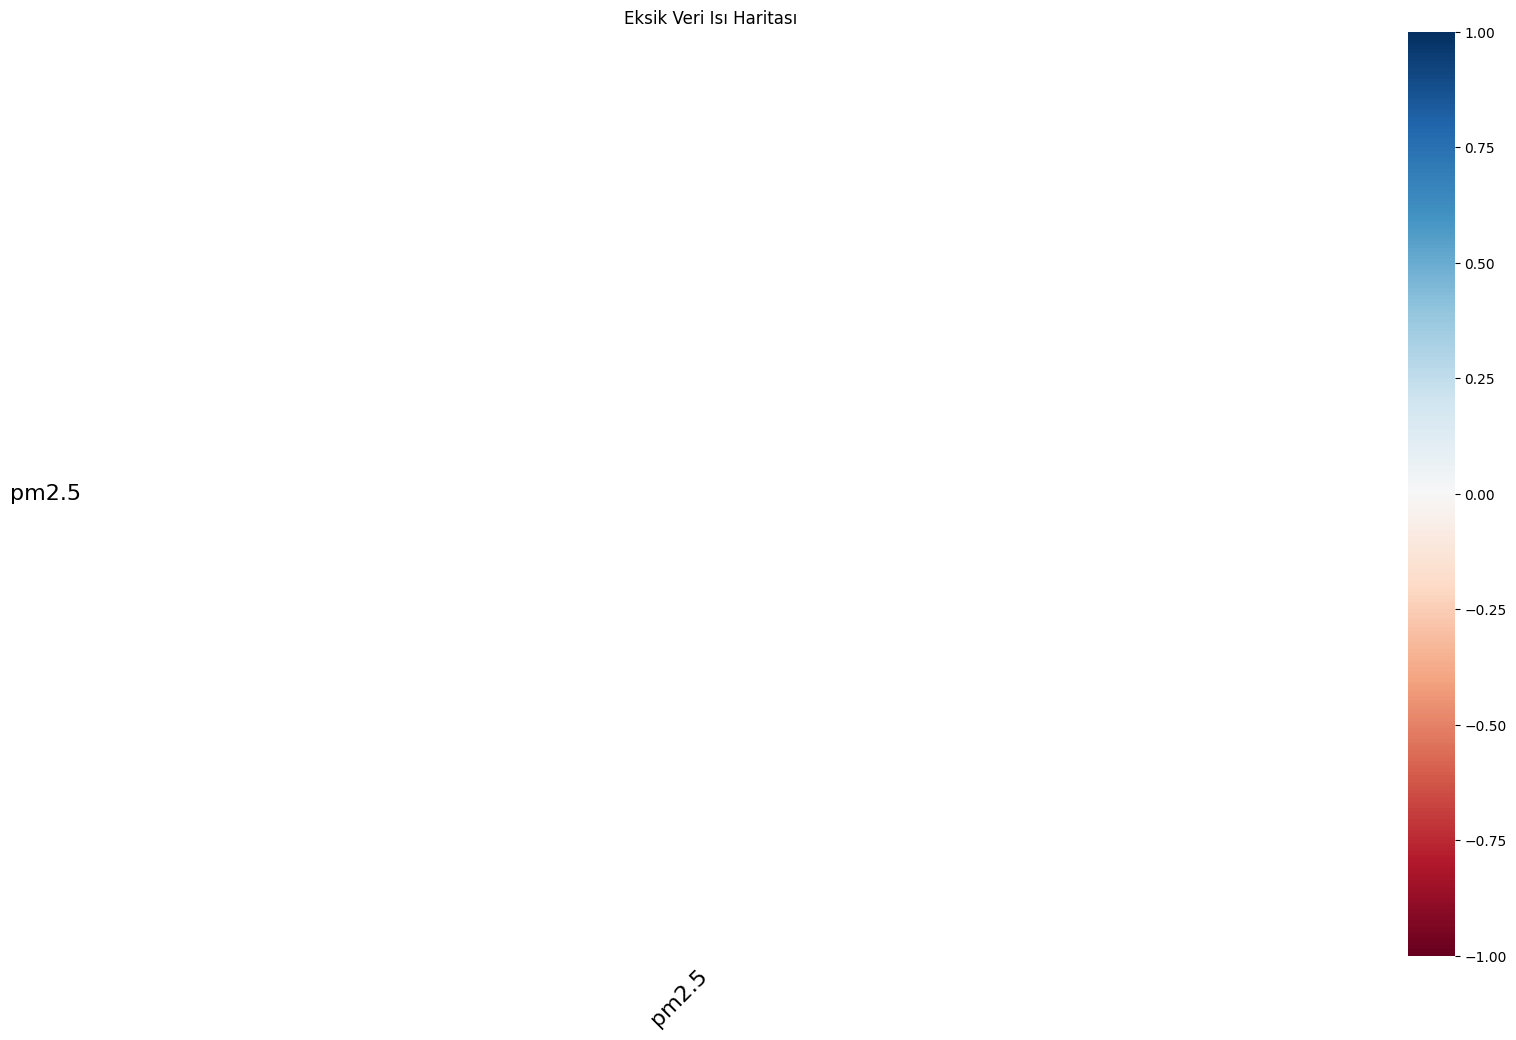

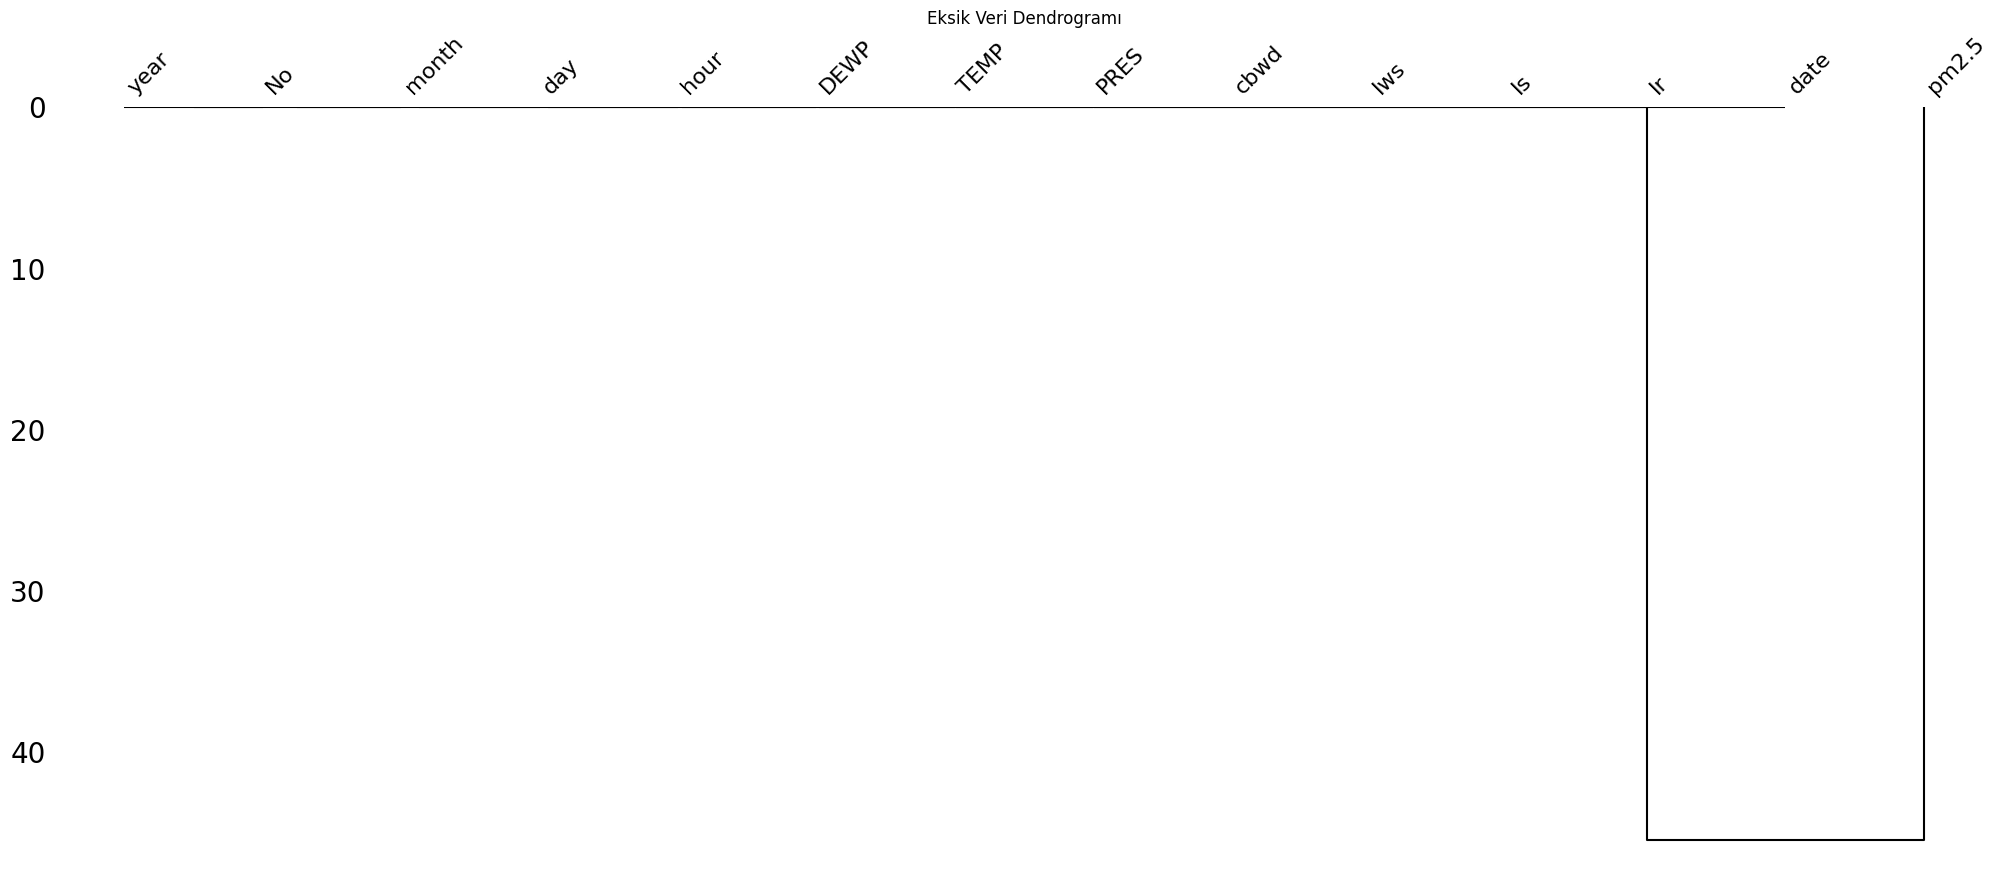

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

# Eksik veri matrisi
msno.matrix(df)
plt.title("Eksik Veri Matrisi")
plt.show()

# Eksik veri çubuk grafiği
msno.bar(df)
plt.title("Sütunlara Göre Eksik Veri Sayısı")
plt.show()

# Eksik veri ısı haritası (eksiklikler arasındaki korelasyonu gösterir)
msno.heatmap(df)
plt.title("Eksik Veri Isı Haritası")
plt.show()

# Eksik veri dendrogramı (eksikliklerin kümelenmesini gösterir)
msno.dendrogram(df)
plt.title("Eksik Veri Dendrogramı")
plt.show()

In [61]:
df['pm2.5'].fillna(df['pm2.5'].median(), inplace=True)

<ipython-input-61-910ed3b37ca4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pm2.5'].fillna(df['pm2.5'].median(), inplace=True)


In [65]:
print(df.head)

<bound method NDFrame.head of           No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd     Iws  \
0          1  2010      1    1     0   72.0   -21 -11.0  1021.0   NW    1.79   
1          2  2010      1    1     1   72.0   -21 -12.0  1020.0   NW    4.92   
2          3  2010      1    1     2   72.0   -21 -11.0  1019.0   NW    6.71   
3          4  2010      1    1     3   72.0   -21 -14.0  1019.0   NW    9.84   
4          5  2010      1    1     4   72.0   -20 -12.0  1018.0   NW   12.97   
...      ...   ...    ...  ...   ...    ...   ...   ...     ...  ...     ...   
43819  43820  2014     12   31    19    8.0   -23  -2.0  1034.0   NW  231.97   
43820  43821  2014     12   31    20   10.0   -22  -3.0  1034.0   NW  237.78   
43821  43822  2014     12   31    21   10.0   -22  -3.0  1034.0   NW  242.70   
43822  43823  2014     12   31    22    8.0   -22  -4.0  1034.0   NW  246.72   
43823  43824  2014     12   31    23   12.0   -21  -3.0  1034.0   NW  249.85   

       Is

4.	İleriye veya Geriye Doldurma (Forward/Backward Fill):
Zaman serisi doğasına uygun olarak komşu değerlerle doldurma (ffill, bfill) stratejileri tartışılmalı.


5.	Interpolasyon Yöntemleri:
Lineer veya zaman bazlı interpolasyon uygulayarak kesintili gözlemler yeniden yapılandırılmalı.

## 📌 6–10: Veri Temizleme ve Aykırı Değer İşleme
6.	Negatif veya Sıfır Değer Tespiti:
pm2.5, TEMP gibi değişkenlerde sıfır ve negatif değerlerin olup olmadığı kontrol edilmeli.



In [66]:
# Sıfır veya negatif değer içeren gözlemleri kontrol et
cols_to_check = ['pm2.5', 'TEMP', 'PRES', 'DEWP', 'Iws']
for col in cols_to_check:
    print(f"{col} değişkeninde sıfır veya negatif değer sayısı: {(df[col] <= 0).sum()}")

pm2.5 değişkeninde sıfır veya negatif değer sayısı: 2
TEMP değişkeninde sıfır veya negatif değer sayısı: 9747
PRES değişkeninde sıfır veya negatif değer sayısı: 0
DEWP değişkeninde sıfır veya negatif değer sayısı: 20837
Iws değişkeninde sıfır veya negatif değer sayısı: 0


In [67]:
print(np.where(df['pm2.5'] <= 0))

(array([24034, 24039]),)


Yorum:

**pm2.5** için sıfır değer olabilir ancak 0 µg/m³ gerçekçi midir, kontrol edilmeli.

**TEMP** < 0 olabilir (özellikle kış ayları için).

**Iws (rüzgar)** için sıfır, düşük hava hareketliliği anlamına gelir, ama uzun süreli sıfır değerlere dikkat edilmelidir.

Negatif **basınç (PRES)** değeri varsa bu veri hatasıdır, çünkü atmosferik basınç negatif olamaz.

7.	Aykırı Değer Görselleştirme:
Boxplot ve zaman serisi grafikleri ile uç değerlerin konumu ve sıklığı analiz edilmeli.


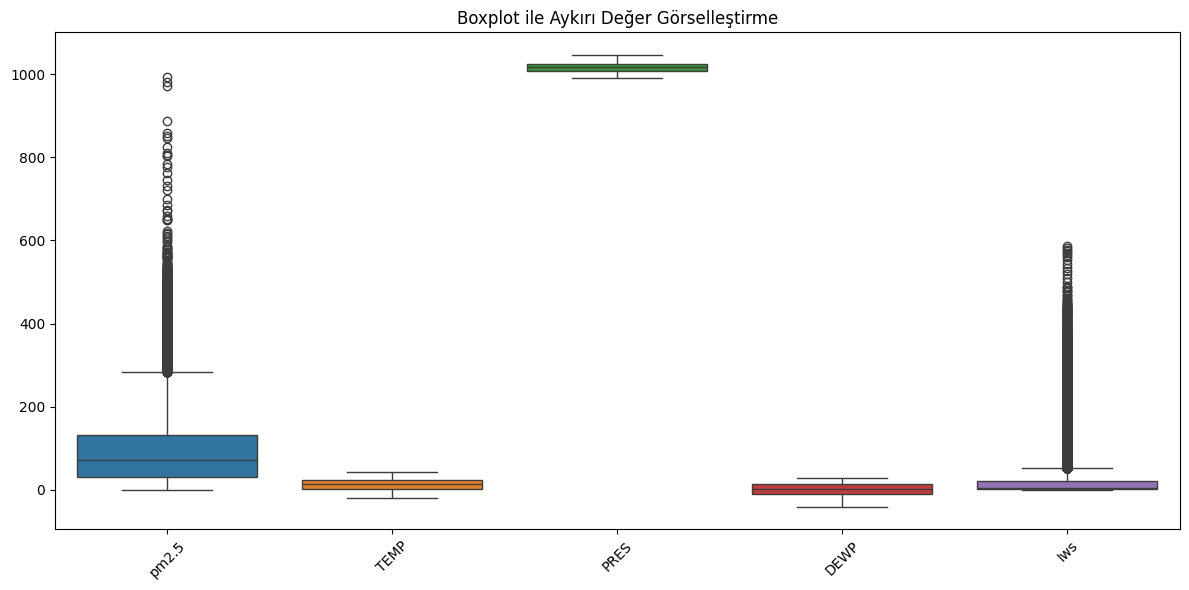

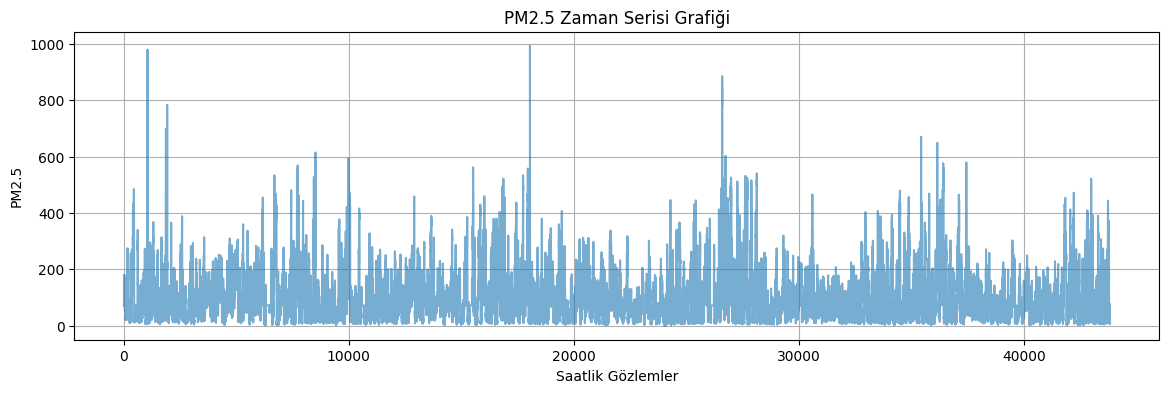

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot ile aykırı değer görselleştirme
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['pm2.5', 'TEMP', 'PRES', 'DEWP', 'Iws']])
plt.title("Boxplot ile Aykırı Değer Görselleştirme")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# PM2.5 zaman serisi
plt.figure(figsize=(14, 4))
plt.plot(df['pm2.5'].values, alpha=0.6)
plt.title("PM2.5 Zaman Serisi Grafiği")
plt.xlabel("Saatlik Gözlemler")
plt.ylabel("PM2.5")
plt.grid(True)
plt.show()

8.	Z-score ve IQR Yöntemleri:
Aykırı değerleri istatistiksel eşiklerle (Z-score > 3, IQR ±1.5) belirle. Hangi değişkenlerde yoğunlukta?


In [69]:
from scipy.stats import zscore

z_scores = df[['pm2.5', 'TEMP', 'PRES', 'DEWP', 'Iws']].apply(zscore)
outliers_zscore = (abs(z_scores) > 3).sum()
print("Z-score > 3 ile aykırı değer sayıları:\n", outliers_zscore)


Z-score > 3 ile aykırı değer sayıları:
 pm2.5     821
TEMP        0
PRES        0
DEWP        0
Iws      1163
dtype: int64


In [70]:
# IQR yöntemiyle
def iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

outliers_iqr = {col: iqr_outliers(df[col]) for col in ['pm2.5', 'TEMP', 'PRES', 'DEWP', 'Iws']}
print("IQR yöntemiyle aykırı değer sayıları:\n", outliers_iqr)


IQR yöntemiyle aykırı değer sayıları:
 {'pm2.5': np.int64(2117), 'TEMP': np.int64(0), 'PRES': np.int64(0), 'DEWP': np.int64(0), 'Iws': np.int64(5101)}


9.	Aykırı Değer Yönetimi:
Uç değerlerin silinmesi, winsorize edilmesi ya da kategorize edilmesi seçenekleri değerlendirilerek işlem yapılmalı.


In [71]:
# PM2.5 için IQR yöntemi ile aykırı değerleri kaldır
Q1 = df['pm2.5'].quantile(0.25)
Q3 = df['pm2.5'].quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[(df['pm2.5'] >= Q1 - 1.5*IQR) & (df['pm2.5'] <= Q3 + 1.5*IQR)]

In [72]:
from scipy.stats.mstats import winsorize

# PM2.5 değişkeni için %1 uç değer winsorize
df['pm2.5_wins'] = winsorize(df['pm2.5'], limits=[0.01, 0.01])


In [75]:
# PM2.5 değerlerini düşük, orta, yüksek diye sınıflandır
df['pm2.5_cat'] = pd.cut(df['pm2.5'], bins=[0, 75, 150, df['pm2.5'].max()],
                         labels=['Düşük', 'Orta', 'Yüksek'])

10.	Mantıksız Kombinasyonlar:
Örneğin; yüksek sıcaklık ve sıfır rüzgar gibi meteorolojik olarak tutarsız gözlemler belirlenmeli.

In [76]:
# Yüksek sıcaklık ve sıfır rüzgar gibi tutarsızlıkları bul
mask = (df['TEMP'] > 30) & (df['Iws'] < 0.1)
print(f"Mantıksız gözlem sayısı (Yüksek sıcaklık & sıfır rüzgar): {mask.sum()}")
df[mask][['TEMP', 'Iws', 'pm2.5']].head()

Mantıksız gözlem sayısı (Yüksek sıcaklık & sıfır rüzgar): 0


,TEMP,Iws,pm2.5


## 📌 11–15: Zaman Bileşenleri ve Yapılandırma
11.	Zaman Bileşenlerinin Türetilmesi:
date değişkeninden yıl, ay, gün, saat, hafta içi/sonu gibi bileşenler oluşturulmalı.

________________________________________


<ipython-input-82-e3bccf83848a>:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M', on='date')['pm2.5'].mean()


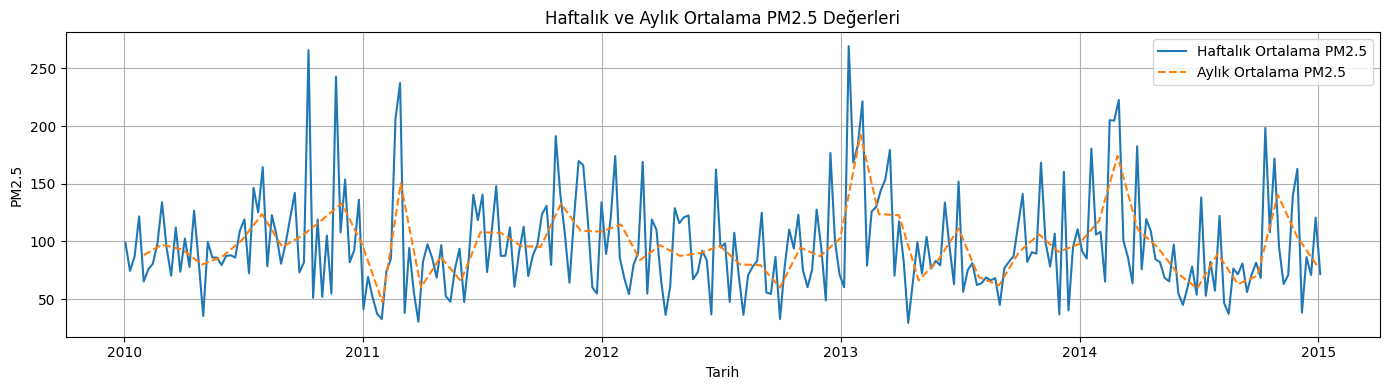

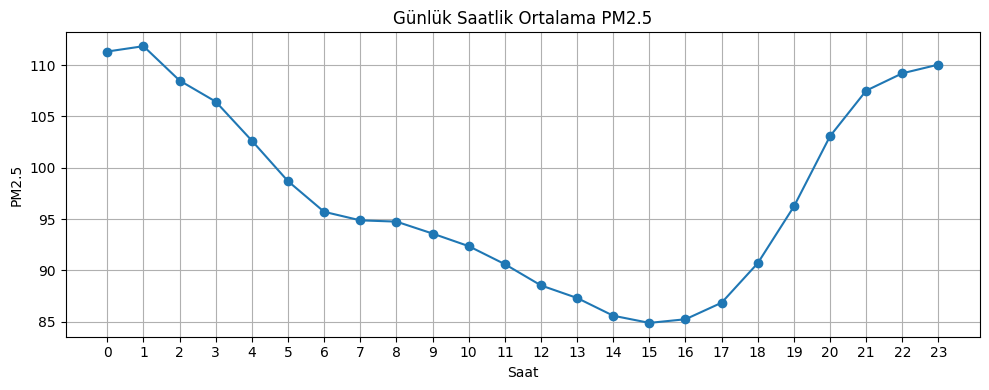

,date,pm2.5,hour,weekday,weekend,season
0,2010-01-01 00:00:00,72.0,0,4,0,Kış
1,2010-01-01 01:00:00,72.0,1,4,0,Kış
2,2010-01-01 02:00:00,72.0,2,4,0,Kış
3,2010-01-01 03:00:00,72.0,3,4,0,Kış
4,2010-01-01 04:00:00,72.0,4,4,0,Kış


In [82]:
# Zaman değişkenlerini datetime formatına çevir ve yeni sütunlar türet
df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['weekday'] = df['date'].dt.weekday
df['weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Ayları mevsim kategorilerine dönüştür
def get_season(month):
    if month in [3, 4, 5]:
        return 'İlkbahar'
    elif month in [6, 7, 8]:
        return 'Yaz'
    elif month in [9, 10, 11]:
        return 'Sonbahar'
    else:
        return 'Kış'

df['season'] = df['month'].apply(get_season)

# Haftalık ve Aylık PM2.5 ortalamaları
weekly_avg = df.resample('W', on='date')['pm2.5'].mean()
monthly_avg = df.resample('M', on='date')['pm2.5'].mean()

# Günün saatlerine göre PM2.5 ortalaması
hourly_avg = df.groupby('hour')['pm2.5'].mean()

# Günlük PM2.5 ortalamaları (resample)
daily_avg = df.resample('D', on='date')['pm2.5'].mean()

# Grafikler
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 4))
plt.plot(weekly_avg, label='Haftalık Ortalama PM2.5')
plt.plot(monthly_avg, label='Aylık Ortalama PM2.5', linestyle='--')
plt.title("Haftalık ve Aylık Ortalama PM2.5 Değerleri")
plt.ylabel("PM2.5")
plt.xlabel("Tarih")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(hourly_avg, marker='o')
plt.title("Günlük Saatlik Ortalama PM2.5")
plt.xlabel("Saat")
plt.ylabel("PM2.5")
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# Örnek veri çerçevesi çıktısı
df[['date', 'pm2.5', 'hour', 'weekday', 'weekend', 'season']].head()


12.	Haftalık ve Aylık Ortalamaların Hesaplanması:
PM2.5 değerlerinin mevsimsel desenleri, hareketli ortalamalarla görselleştirilmeli.


13.	Saatlik Değişim Analizi:
Günün saatlerine göre hava kirliliği seviyeleri analiz edilerek trafik ve enerji kullanımıyla ilişkilendirilmelidir.


14.	Mevsimsel Grup Türetilmesi:
Ayları mevsim kategorilerine (İlkbahar, Yaz, vb.) dönüştürerek analiz yapılmalı.


15.	Resample Yöntemi ile Agregasyon:
Zaman aralıklarını (günlük, haftalık, aylık) yeniden örnekleyerek veri hacmi yönetilebilir hale getirilmeli.

## 📌 16–20: Dönüşüm, Ölçekleme ve Hazırlık
16.	Kategorik Kodlama – Rüzgar Yönü (cbwd):
cbwd kategorik değişkeni uygun şekilde one-hot encoding veya label encoding ile sayısallaştırılmalı.



17.	Sürekli Değişkenlerin Normalizasyonu:
Özellikle regresyon veya makine öğrenmesi modellerinde TEMP, PRES, Iws gibi değişkenler ölçeklenmeli.


18.	PM2.5 Kirlilik Seviyesi Etiketleme:
Dünya Sağlık Örgütü’nün kılavuzlarına göre PM2.5 seviyeleri kategorilere ayrılarak sınıflandırılabilir.
1

19.	Veri Tabanlı Kirlilik Uyarı Sistemi Kurulumu (Opsiyonel):
Kritik eşiğin üstünde kalan gözlemler için uyarı sistemi (binary flag) oluşturulabilir.


20.	Final Veri Setinin Oluşturulması:
Eksik veri giderilmiş, aykırı değerlerden arındırılmış, zaman bileşenleriyle zenginleştirilmiş ve sayısallaştırılmış bir final veri seti oluşturulmalı ve modellemeye hazır hale getirilmelidir.

In [ ]:
# Eksik değerleri tespit et
missing_values = df.isnull().sum()

# Eksik veri içeren sütunları filtreleyerek sadece eksik değerleri gösterelim
missing_values = missing_values[missing_values > 0]

# Sonucu daha düzenli görüntüleyelim
print("Eksik Değer Sayıları:\n")
print(missing_values)

Eksik Değer Sayıları:

pm2.5    2067
dtype: int64


In [ ]:
# pm2.5 sütunundaki eksik değerleri medyan ile doldurma
df['pm2.5'].fillna(df['pm2.5'].median(), inplace=True)

<ipython-input-13-180e40d0183b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pm2.5'].fillna(df['pm2.5'].median(), inplace=True)


In [ ]:
## Eksik Verileri Medyan ile Doldurma
# Önce medyan değeri hesaplayalım
pm25_median = df['pm2.5'].median()
print(f"\npm2.5 medyan değeri: {pm25_median}")


pm2.5 medyan değeri: 72.0


In [ ]:
print("\nEksik veri sayıları:")
print(df.isnull().sum())


Eksik veri sayıları:
No       0
year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64


In [ ]:
print("\nHer sütundaki benzersiz değer sayısı:")
print(df.nunique())


Her sütundaki benzersiz değer sayısı:
No       43824
year         5
month       12
day         31
hour        24
pm2.5      581
DEWP        69
TEMP        64
PRES        60
cbwd         4
Iws       2788
Is          28
Ir          37
dtype: int64


In [ ]:
print("\nRastgele 5 satır örneği:")
print(df.sample(5, random_state=42))  # random_state ile tekrarlanabilirlik sağladık


Rastgele 5 satır örneği:
          No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd   Iws  \
21656  21657  2012      6   21     8  193.0    19  25.0  1005.0   cv  1.78   
1570    1571  2010      3    7    10   57.0   -10  -2.0  1035.0   SE  4.92   
35359  35360  2014      1   13     7  106.0   -19 -11.0  1033.0   NW  1.79   
22943  22944  2012      8   13    23   47.0    19  20.0  1009.0   SE  4.47   
32622  32623  2013      9   21     6   34.0    15  18.0  1016.0   cv  0.45   

       Is  Ir  
21656   0   0  
1570    0   0  
35359   0   0  
22943   0   0  
32622   0   0  


In [ ]:
print(df.head())

   No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0   72.0   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1   72.0   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2   72.0   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3   72.0   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4   72.0   -20 -12.0  1018.0   NW  12.97   0   0
